In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math

# 1. Explore the data. Preprocessing.

In [2]:
df = pd.read_csv('shipdata.txt', delimiter='\t')
print(df.head())
df.shape

        MMSI  Speed (knots)  COG (degrees) Destination Ship type  \
0  636015204           10.1           64.3      Hamina     Cargo   
1  230182000            8.4           65.8      Hamina     Cargo   
2  230601000           10.1           74.9      Hamina     Cargo   
3  636092755            9.2           74.6      Hamina     Cargo   
4  215058000            9.6           73.2      Hamina     Cargo   

   Gross tonnage  Length (m)  Breadth (m)  
0           3416        94.9         15.3  
1           3978      1000.0         16.5  
2           2280        82.6         12.3  
3           8620       137.1         19.1  
4           1905        87.9         11.4  


(107, 8)

Check, how many different ship types there are:

In [3]:
df_cat = df.astype('category')
df_cat['Ship type'];
df["Ship type"].value_counts()

Cargo     50
Tanker    48
Tug        9
Name: Ship type, dtype: int64

Plot a scatter plot using ship length and gross tonnage, using a different color
for each ship type:

In [4]:
df_cargo = df.loc[df['Ship type'] == 'Cargo']
df_tanker = df.loc[df['Ship type'] == 'Tanker']
df_tug = df.loc[df['Ship type'] == 'Tug']
print('Cargo: ', df_cargo.shape)
print('Tanker: ', df_tanker.shape)
print('Tug: ', df_tug.shape)


Cargo:  (50, 8)
Tanker:  (48, 8)
Tug:  (9, 8)


In [5]:
X_ca = df_cargo.loc[:, "Gross tonnage":"Length (m)"].values
X_ta = df_tanker.loc[:, "Gross tonnage":"Length (m)"].values
X_tu = df_tug.loc[:, "Gross tonnage":"Length (m)"].values

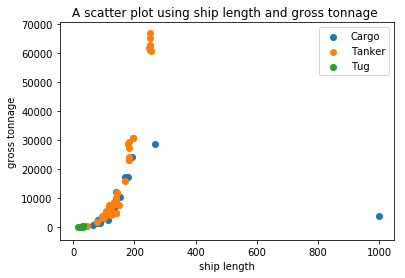

In [6]:
labels = ['Cargo', 'Tanker', 'Tug']
plt.scatter(X_ca[:,1], X_ca[:,0])
plt.scatter(X_ta[:,1], X_ta[:,0])
plt.scatter(X_tu[:,1], X_tu[:,0])
plt.legend(labels)
plt.title("A scatter plot using ship length and gross tonnage ")
plt.xlabel("ship length")
plt.ylabel("gross tonnage")
plt.show()

In the scatter plot we can see, that there seems to be at least one outlier. I tried to find the correct length from marinetraffic.com but with MMSI=230182000, I found totally different ship. I tried some other MMSIs also and noticed that they didn't match MMSIs of marinetraffic.com either. Thus I removed it and plot the scatter plot again.

Cargo:  (49, 8)
Tanker:  (48, 8)
Tug:  (9, 8)


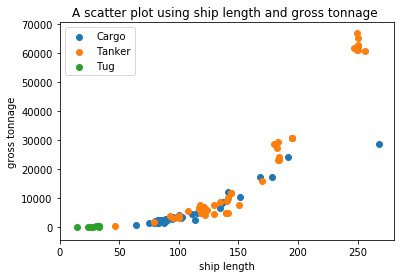

In [7]:
df=df[df.MMSI != 230182000]
df_cargo = df.loc[df['Ship type'] == 'Cargo']
df_tanker = df.loc[df['Ship type'] == 'Tanker']
df_tug = df.loc[df['Ship type'] == 'Tug']
print('Cargo: ', df_cargo.shape)
print('Tanker: ', df_tanker.shape)
print('Tug: ', df_tug.shape)
X_ca = df_cargo.loc[:, "Gross tonnage":"Length (m)"].values
X_ta = df_tanker.loc[:, "Gross tonnage":"Length (m)"].values
X_tu = df_tug.loc[:, "Gross tonnage":"Length (m)"].values
labels = ['Cargo', 'Tanker', 'Tug']
plt.scatter(X_ca[:,1], X_ca[:,0])
plt.scatter(X_ta[:,1], X_ta[:,0])
plt.scatter(X_tu[:,1], X_tu[:,0])
plt.legend(labels)
plt.title("A scatter plot using ship length and gross tonnage ")
plt.xlabel("ship length")
plt.ylabel("gross tonnage")
plt.show()


According to the scatter plot there may still be one outlier. MMSI of that ship doesn't match with the MMSI of marinetraffic.com, thus I can't know the right ship length. Because all other ships seems to be on the same curve and there is still more cargos than other types of ships, I desided to remove that ship also.

Cargo:  (48, 8)
Tanker:  (48, 8)
Tug:  (9, 8)


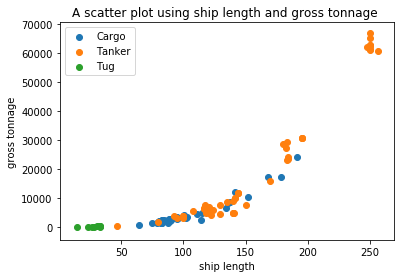

In [8]:
df=df[df.MMSI != 245301000]
df_cargo = df.loc[df['Ship type'] == 'Cargo']
df_tanker = df.loc[df['Ship type'] == 'Tanker']
df_tug = df.loc[df['Ship type'] == 'Tug']
print('Cargo: ', df_cargo.shape)
print('Tanker: ', df_tanker.shape)
print('Tug: ', df_tug.shape)
X_ca = df_cargo.loc[:, "Gross tonnage":"Length (m)"].values
X_ta = df_tanker.loc[:, "Gross tonnage":"Length (m)"].values
X_tu = df_tug.loc[:, "Gross tonnage":"Length (m)"].values
labels = ['Cargo', 'Tanker', 'Tug']
plt.scatter(X_ca[:,1], X_ca[:,0])
plt.scatter(X_ta[:,1], X_ta[:,0])
plt.scatter(X_tu[:,1], X_tu[:,0])
plt.legend(labels)
plt.title("A scatter plot using ship length and gross tonnage ")
plt.xlabel("ship length")
plt.ylabel("gross tonnage")
plt.show()

Now the scatter plot looks good.

The numerical variables have quite different ranges so it is good to make a Z-score standardization. Perform it for speed, length, breadth and gross tonnage:

In [9]:
df.head()

,MMSI,Speed (knots),COG (degrees),Destination,Ship type,Gross tonnage,Length (m),Breadth (m)
0,636015204,10.1,64.3,Hamina,Cargo,3416,94.9,15.3
2,230601000,10.1,74.9,Hamina,Cargo,2280,82.6,12.3
3,636092755,9.2,74.6,Hamina,Cargo,8620,137.1,19.1
4,215058000,9.6,73.2,Hamina,Cargo,1905,87.9,11.4
5,236039000,9.9,74.6,Hamina,Cargo,8521,136.0,32.0


In [10]:
def z_score(column): 
    return (column - column.mean()) / column.std()

Speed_z=z_score(df['Speed (knots)'])
Length_z=z_score(df['Length (m)'])
Breadth_z=z_score(df['Breadth (m)'])
Crosst_z=z_score(df['Gross tonnage'])

d = {'MMSI': df['MMSI'], 
     'COG': df['COG (degrees)'],
     'Type': df['Ship type'],
     'Destin': df['Destination'],
     'Speed_z': Speed_z, 
     'Crosst_z': Crosst_z,
     'Length_z': Length_z, 
     'Breadth_z': Breadth_z,
    }
dfz = pd.DataFrame(data=d)
dfz.head()



,MMSI,COG,Type,Destin,Speed_z,Crosst_z,Length_z,Breadth_z
0,636015204,64.3,Cargo,Hamina,0.023278,-0.472487,-0.459348,-0.390179
2,230601000,74.9,Cargo,Hamina,0.023278,-0.537496,-0.674441,-0.692606
3,636092755,74.6,Cargo,Hamina,-0.454925,-0.174680,0.278613,-0.007105
4,215058000,73.2,Cargo,Hamina,-0.242391,-0.558956,-0.581759,-0.783334
5,236039000,74.6,Cargo,Hamina,-0.082990,-0.180345,0.259378,1.293332


Destination harbor is a categorical variable. I convert it as numerical:

In [11]:
dfd=pd.get_dummies(dfz, prefix=['d'], columns=['Destin'])
dfd.head()

,MMSI,COG,Type,Speed_z,Crosst_z,Length_z,Breadth_z,d_Hamina,d_Helsinki,d_Kotka,...,d_Muuga,d_Paldiski,d_Porvoo,d_Primorsk,d_Tallinn,d_Ust-Luga,d_Valko Loviisa,d_Vuosaari,d_Vyborg,d_Vysotsk
0,636015204,64.3,Cargo,0.023278,-0.472487,-0.459348,-0.390179,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,230601000,74.9,Cargo,0.023278,-0.537496,-0.674441,-0.692606,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,636092755,74.6,Cargo,-0.454925,-0.174680,0.278613,-0.007105,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,215058000,73.2,Cargo,-0.242391,-0.558956,-0.581759,-0.783334,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,236039000,74.6,Cargo,-0.082990,-0.180345,0.259378,1.293332,1,0,0,...,0,0,0,0,0,0,0,0,0,0


I want to see the scatter plot with standardized values:

Cargo:  (48, 8)
Tanker:  (48, 8)
Tug:  (9, 8)


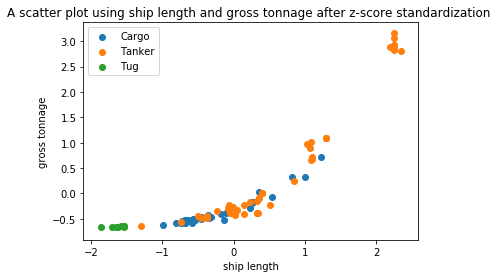

In [12]:
df_cargo = dfz.loc[df['Ship type'] == 'Cargo']
df_tanker = dfz.loc[df['Ship type'] == 'Tanker']
df_tug = dfz.loc[df['Ship type'] == 'Tug']
print('Cargo: ', df_cargo.shape)
print('Tanker: ', df_tanker.shape)
print('Tug: ', df_tug.shape)
X_ca = df_cargo.loc[:, "Crosst_z":"Length_z"].values
X_ta = df_tanker.loc[:, "Crosst_z":"Length_z"].values
X_tu = df_tug.loc[:, "Crosst_z":"Length_z"].values
labels = ['Cargo', 'Tanker', 'Tug']
plt.scatter(X_ca[:,1], X_ca[:,0])
plt.scatter(X_ta[:,1], X_ta[:,0])
plt.scatter(X_tu[:,1], X_tu[:,0])
plt.legend(labels)
plt.title("A scatter plot using ship length and gross tonnage after z-score standardization ")
plt.xlabel("ship length")
plt.ylabel("gross tonnage")
plt.show()

# 2. Predict the ship type with the speed, destination, length, breadth and gross tonnage data using kNN classifier with k=3. Find an estimation for the classification accuracy using random training and test sets.

In [13]:
y=dfd.loc[:, 'Type']
X=dfd.loc[:, 'Speed_z':'d_Vysotsk']
X.head()

,Speed_z,Crosst_z,Length_z,Breadth_z,d_Hamina,d_Helsinki,d_Kotka,d_Kronshtadt,d_Kunda,d_Muuga,d_Paldiski,d_Porvoo,d_Primorsk,d_Tallinn,d_Ust-Luga,d_Valko Loviisa,d_Vuosaari,d_Vyborg,d_Vysotsk
0,0.023278,-0.472487,-0.459348,-0.390179,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.023278,-0.537496,-0.674441,-0.692606,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.454925,-0.174680,0.278613,-0.007105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.242391,-0.558956,-0.581759,-0.783334,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,-0.082990,-0.180345,0.259378,1.293332,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Divide the data randomly into training (70 %) and test sets (30 %). I use stratification because there are only nine tugs in the data. I used help from here: https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas.

In [14]:
def get_train_test_inds(y,train_proportion=0.7):
    y=np.array(y)
    train_inds = np.zeros(len(y),dtype=bool)
    test_inds = np.zeros(len(y),dtype=bool)
    values = np.unique(y)
    for value in values:
        value_inds = np.nonzero(y==value)[0]
        np.random.shuffle(value_inds)
        n = int(train_proportion*len(value_inds))

        train_inds[value_inds[:n]]=True
        test_inds[value_inds[n:]]=True

    return train_inds,test_inds



Repeat the calculation 1000 times, and for each repetition, calculate the classification accuracy, i.e. how many times the classifier predicts the ship type correctly divided by the number of the ships in the test data. Plot the repeated classification accuracy values. I used Error_estimation demo as help.

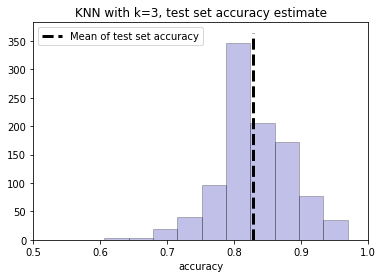

Mean of test set accuracy:  0.8287878787878786
Worst accuracy:  0.6060606060606061


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy = []
for i in range(1000):
    train_inds,test_inds=get_train_test_inds(y,train_proportion=0.7)
    X_train=X[train_inds]
    y_train=y[train_inds] 
    X_test=X[test_inds]
    y_test=y[test_inds]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    y_p = knn.predict(X_test)
    acc=accuracy_score(y_p, y_test)
    accuracy.append(acc)
axes = plt.gca()
plt.hist(accuracy, edgecolor="black", facecolor='#0504aa', alpha=0.25)
ylim = axes.get_ylim()
plt.plot(2 * [np.mean(accuracy)], ylim, '--k', linewidth=3, label='Mean of test set accuracy')
plt.title("KNN with k=3, test set accuracy estimate")
plt.legend()
plt.xlim((0.5,1))
plt.xlabel("accuracy")
plt.show()
print('Mean of test set accuracy: ',np.mean(accuracy) )
print('Worst accuracy: ',np.min(accuracy) )

I have run this about 20 times. The histogram varies but the mean is always between 0,82 and 0,83. But if you are unlucky, the accuracy for one prediction can be under 0,6.

# 3. Predict the ship type with the speed, destination, length, breadth and gross tonnage data using kNN classifier with k=3. Find an estimation of the classification accuracy using leave-one-out. Find the optimal value for k.

I used https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

In [16]:
from sklearn.model_selection import LeaveOneOut
X = X.values
y = y.values
loo = LeaveOneOut()

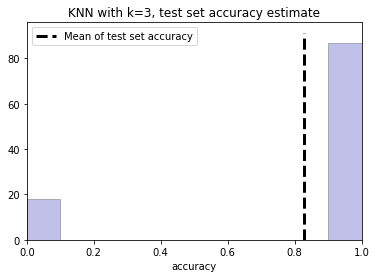

Mean of test set accuracy:  0.8285714285714286
Worst accuracy:  0.0


In [17]:
accuracy = []
for train_index, test_index in loo.split(X):
    X_train=X[train_index]
    y_train=y[train_index] 
    X_test=X[test_index]
    y_test=y[test_index]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    y_p = knn.predict(X_test)
    acc=accuracy_score(y_p, y_test)
    accuracy.append(acc)
axes = plt.gca()
plt.hist(accuracy, edgecolor="black", facecolor='#0504aa', alpha=0.25)
ylim = axes.get_ylim()
plt.plot(2 * [np.mean(accuracy)], ylim, '--k', linewidth=3, label='Mean of test set accuracy')
plt.title("KNN with k=3, test set accuracy estimate")
plt.legend()
plt.xlim((0,1))
plt.xlabel("accuracy")
plt.show()
print('Mean of test set accuracy: ',np.mean(accuracy) )
print('Worst accuracy: ',np.min(accuracy) )

When calculated with this method, the classification accuracy is 0,83. In task 2 the mean of accuracy varied a little each time you run the algorithm. With this method training set is larger. This method is a better evaluation of the performance of the classifier with this data set.

Repeat the calculation with values k=1…20:

In [18]:
accur_k = []
for k in range(1,21):
    accuracy = []
    for train_index, test_index in loo.split(X):
        X_train=X[train_index]
        y_train=y[train_index] 
        X_test=X[test_index]
        y_test=y[test_index]
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_p = knn.predict(X_test)
        acc=accuracy_score(y_p, y_test)
        accuracy.append(acc)
    accur_k.append(np.mean(accuracy))


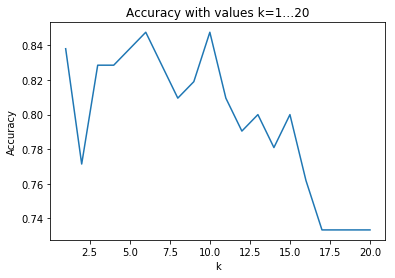

The best classification accuracy achieved:  0.8476190476190476 , with k =  6


In [19]:
k = np.arange(1 , 21)
plt.plot(k, accur_k )
plt.title('Accuracy with values k=1…20')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.show()

max_a=max(accur_k)
print('The best classification accuracy achieved: ',max(accur_k), ', with k = ', (np.argmax(accur_k)+1 ))

The best classification accuracy 0.85 can be achieved with k=6 and k=10.

# 4. Testing with training data (generally, this should NOT be used!)

In [20]:
accur_k_all = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    y_p = knn.predict(X)
    acc=accuracy_score(y_p, y)
    accur_k_all.append(acc)


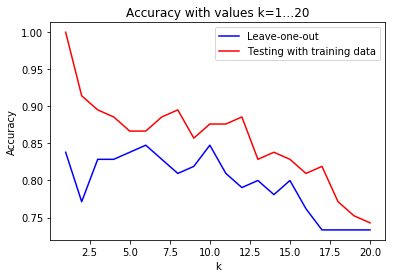

The best classification accuracy achieved:  1.0 , with k =  1


In [21]:
k = np.arange(1 , 21)
plt.plot(k, accur_k, color='blue', label='Leave-one-out' )
plt.plot(k, accur_k_all, color='red', label='Testing with training data' )
plt.title('Accuracy with values k=1…20')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.legend()
plt.show()

max_a=max(accur_k_all)
print('The best classification accuracy achieved: ',max(accur_k_all), ', with k = ', (np.argmax(accur_k_all)+1 ))

You shouldn’t test with your training data, because it gives too optimistic accuracy. With k=1, accuracy is even 1! 

# A bonus task
Implement nested-cross-validation for task 3 to estimate the classification accuracy of K-nn method that selects the optimal value k=1…20. If running leave-one-out inside leave-one-out takes too much time, youcan replace either inner or outer CV loop with 10-fold CV. Does the classification accuracy achieved differ from the one obtained earlier?

I first write inner and outer loops as functions:

In [22]:
def inner(X,y):
    accur_k = []
    for k in range(1,21):
        accuracy = []
        for train_index, test_index in loo.split(X):
            X_train=X[train_index]
            y_train=y[train_index] 
            X_test=X[test_index]
            y_test=y[test_index]
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train,y_train)
            y_p = knn.predict(X_test)
            acc=accuracy_score(y_p, y_test)
            accuracy.append(acc)
        accur_k.append(np.mean(accuracy))
    return np.argmax(accur_k)+1


In [23]:
def outer(X_inner,y_inner,X_outer,y_outer, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_inner,y_inner)
    y_p = knn.predict(X_outer)
    return accuracy_score(y_p, y_outer)
    

Now I am ready for nested-cross-validation:

In [24]:
accuracy_outer=[]
k_best_outer=[]
for train_index, test_index in loo.split(X):
    X_inner=X[train_index]
    y_inner=y[train_index] 
    X_outer=X[test_index]
    y_outer=y[test_index]
    k_best=inner(X_inner,y_inner)
    k_best_outer.append(k_best)
    acc_out=outer(X_inner,y_inner,X_outer,y_outer, k_best)
    accuracy_outer.append(acc_out)

print('accuracy: ', np.mean(accuracy_outer))
    

accuracy:  0.8095238095238095


With nested-cross-validation method classification accuracy is 0,81, which is slightly worse than the estimation of the classification accuracy using leave-one-out method (0,85). We can assume that 0,81 is less biased estimation for classification accuracy.

In [36]:
k_df=pd.DataFrame(data=k_best_outer, columns=['k'])
k_df['k'].value_counts()

6     70
10    13
1     12
5     10
Name: k, dtype: int64